In [1]:
# IMPORTING LIBRARIES
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D 
import cv2
from sklearn.model_selection import train_test_split
import pickle
import os 
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator
from traffic_sign_classes import classes
from keras.callbacks import Callback, ModelCheckpoint
print('Libraries Imported Successfully')
#   ===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <=============== 

Libraries Imported Successfully


**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**


In [2]:
dataset = pd.read_csv("./Dataset/Train.csv")
dataset.head(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png
5,31,27,6,5,26,22,20,Train/20/00020_00000_00005.png
6,31,28,6,6,26,23,20,Train/20/00020_00000_00006.png
7,31,28,6,6,26,23,20,Train/20/00020_00000_00007.png
8,31,29,5,6,26,24,20,Train/20/00020_00000_00008.png
9,34,32,6,6,29,26,20,Train/20/00020_00000_00009.png


In [3]:
# SETTING PARAMETERS
path = "./Dataset/Train/"
labelFile = "./Dataset/labels.csv"
batchSizeVal = 50
no_of_epochs = 100
imageDimensions = (64,64,3)
testRatio = 0.2
validationRatio = 0.2

In [4]:
# IMPORTING IMAGES
count = 0
images = []
classNum = []
imageList = os.listdir(path)
print("Total Classes Detected: ", len(imageList))
no_of_classes = len(imageList)

for x in range(0, len(imageList)):
    signsList = os.listdir(path + "/" + str(count))
    for y in signsList:
        currImage = cv2.imread(path + "/" + str(count) + "/" + y)
        currImage = cv2.resize(currImage, (64,64))
        images.append(currImage)
        classNum.append(count)
    print(count, end=" ")
    count += 1
print(" ")
images = np.array(images)
classNum = np.array(classNum) 


Total Classes Detected:  63
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62  


In [5]:
#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(images, classNum, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train,y_train,test_size=validationRatio)


In [6]:
# CHECKING NUMBER OF IMAGES MATCHES TO NUMBERS OF LABEL FOR EACH DATASET
print("Data Shapes")
print("Train",end=""); print(X_train.shape,y_train.shape)
print("Validation",end=""); print(X_validation.shape,y_validation.shape)
print("Test",end=""); print(X_test.shape,y_test.shape)
assert(X_train.shape[0] == y_train.shape[0])
assert(X_validation.shape[0] == y_validation.shape[0])
assert(X_test.shape[0] == y_test.shape[0])

assert(X_train.shape[1:] == (imageDimensions))
assert(X_validation.shape[1:] == (imageDimensions))
assert(X_test.shape[1:] == (imageDimensions))


Data Shapes
Train(50260, 64, 64, 3) (50260,)
Validation(12565, 64, 64, 3) (12565,)
Test(15707, 64, 64, 3) (15707,)


**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**


In [7]:
# READ CSV
data = pd.read_csv(labelFile)
print("Data Shape: ", data.shape, type(data))

Data Shape:  (63, 2) <class 'pandas.core.frame.DataFrame'>


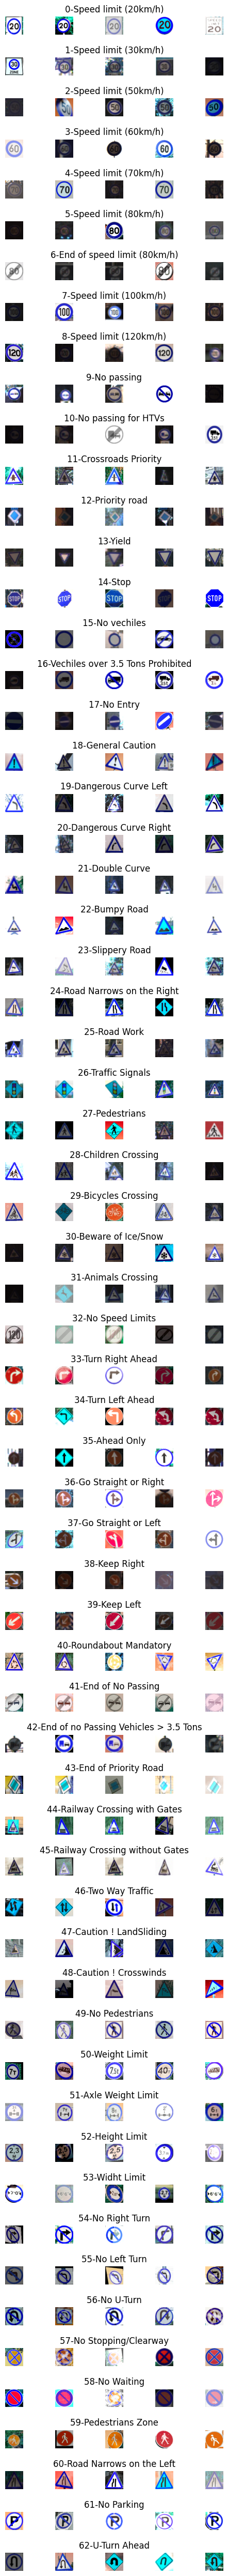

In [8]:
# DISPLAYING SOME SAMPLE IMAGES OF ALL THE CLASSES

samplesNum = []
cols = 5
numClasses = no_of_classes
fig, axs = plt.subplots(nrows=numClasses, ncols=cols, figsize=(5,5*10))
fig.tight_layout()
for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "-" + row["Name"])
            samplesNum.append(len(x_selected))


**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**


[602, 1843, 1879, 1374, 1633, 1596, 434, 1464, 1387, 1365, 1459, 1062, 1582, 1615, 758, 621, 453, 937, 1074, 428, 490, 563, 623, 640, 712, 1255, 960, 540, 728, 978, 545, 853, 487, 844, 744, 1116, 586, 321, 1584, 474, 826, 421, 289, 163, 140, 174, 390, 656, 442, 432, 684, 443, 529, 404, 524, 544, 661, 969, 518, 573, 511, 600, 758]


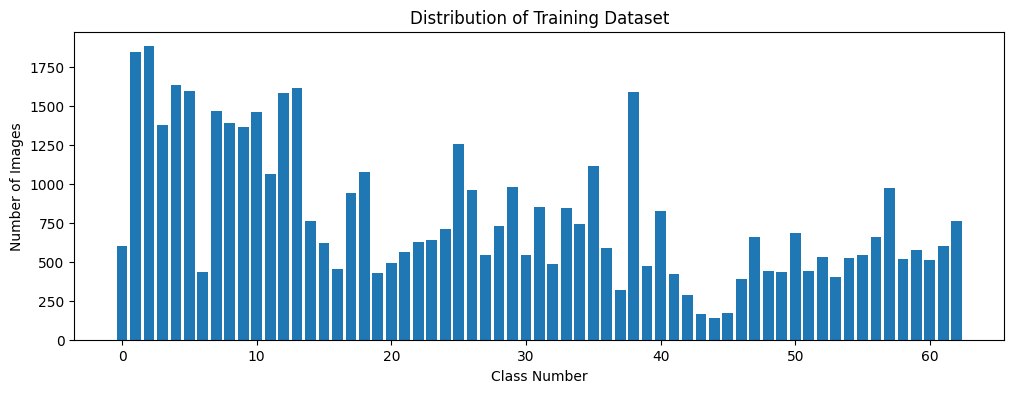

In [9]:
# DISPLAYING BAR CHART SHOWING NUMBER OF SAMPLES FROM EACH CATEGORY
print(samplesNum)
plt.figure(figsize=(12,4))
plt.bar(range(0, numClasses), samplesNum)
plt.title("Distribution of Training Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

# From the bar chart below we can see that our dataset is not evenly distributed.
# We dont have even number of images for each class
# Hence we might get classification for one class but no for other becuase of uneven dataset

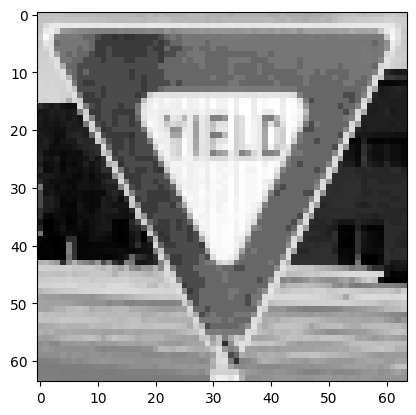

In [10]:
# IMAGE PRE_PROCESSING

def grayScale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img 

def preProcessing(img):
        img = grayScale(img) # convert to grayscale
        img = equalize(img)  # standardize the lightning in an image
        img = img/255       # to normalize values between 0 and 1 instead of 0 to 255
        return img

X_train = np.array(list(map(preProcessing, X_train)))
X_validation = np.array(list(map(preProcessing, X_validation)))
X_test = np.array(list(map(preProcessing, X_test)))
plt.imshow(X_train[random.randint(0,len(X_train)-1)], cmap="gray")


In [11]:
print("\nShapes after preprocessing:")
print("X_train shape:", X_train.shape)
print("X_validation shape:", X_validation.shape)
print("X_test shape:", X_test.shape)


Shapes after preprocessing:
X_train shape: (50260, 64, 64)
X_validation shape: (12565, 64, 64)
X_test shape: (15707, 64, 64)


**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**


In [12]:
# ADDING DEPTH OF 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)

In [13]:
# AUGMENTATION OF IMAGES TO MAKE IT MORE GENERIC
dataGen = ImageDataGenerator(width_shift_range=0.1,     # 0.1 = 10%. If more than 1 it refers to No# of pixels
                             height_shift_range=0.1,    
                             zoom_range=0.2,        # 0.2 means can go from 0.8 to 1.2
                             shear_range=0.1,       # magnitude of shear angle 
                             rotation_range=10)     # Degrees

#X_train = np.expand_dims(X_train, axis=-1)
dataGen.fit(X_train)
batches = dataGen.flow(X_train,y_train,batch_size=20) # Requesting DataGen to generate images batch size = No# of images created each time its called
X_batch, y_batch = next(batches)


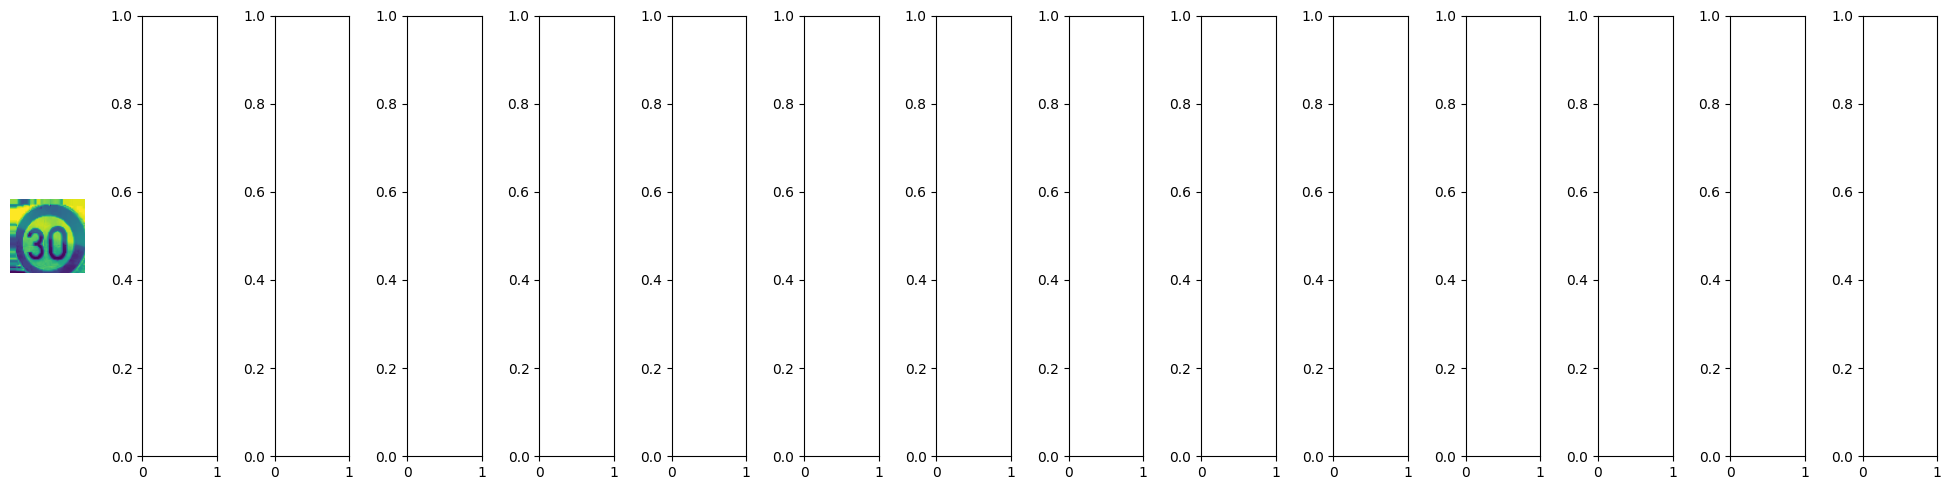

In [14]:
# SHOW AUGMENTED IMAGE SAMPLES
fig, axs = plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0],imageDimensions[1]))
    axs[i].axis("off")
    plt.show()
plt.show()

In [15]:
y_train = to_categorical(y_train,no_of_classes)
y_validation = to_categorical(y_validation,no_of_classes)
y_test = to_categorical(y_test,no_of_classes) 

In [16]:
# CONVOLUTIONAL NEURAL NETWORK MODEL
def myModel():
    no_of_filters = 60
    size_of_filters1 = (5,5)     # This is the kernel that move around image to get features
    size_of_filters2 = (3,3)
    size_of_pool = (2,2)    # Scale down all feature map to generalize more to reduce overfitting
    no_of_Nodes = 500   # No of nodes in hidden layers

    model = Sequential()
    model.add((Conv2D(no_of_filters,size_of_filters1,input_shape=(imageDimensions[0], imageDimensions[1],1), activation='relu')))
    model.add(BatchNormalization())
    model.add((Conv2D(no_of_filters,size_of_filters1,activation='relu')))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=size_of_pool))

    model.add((Conv2D(no_of_filters//2, size_of_filters2,activation='relu')))
    model.add(BatchNormalization())
    model.add((Conv2D(no_of_filters // 2, size_of_filters2,activation='relu')))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(no_of_Nodes,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(no_of_classes,activation='softmax'))

    model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
    return model


**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**


In [17]:
# TRAINING 1
# The code below trains the model and saves the best weights during training and tell us whether val_loss improved or not

import tensorflow as tf 
from keras.callbacks import TensorBoard
import datetime

model = myModel()
print(model.summary())

stepsPerEpochVal = len(X_train) // batchSizeVal
callbacks = [
    ModelCheckpoint("./Trained Models/Weights/best_weights.h5",
                    save_best_only=True, save_weights_only=True,
                    monitor='val_loss', mode='min', verbose=1),
    
    TensorBoard(log_dir="./logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
                histogram_freq=1)
]
history = model.fit(dataGen.flow(X_train,y_train,batch_size=batchSizeVal),
                    steps_per_epoch=stepsPerEpochVal,
                    epochs=no_of_epochs,
                    validation_data=(X_validation,y_validation),
                    shuffle=1, callbacks=callbacks)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 60)        1560      
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 60)       240       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 60)        90060     
                                                                 
 batch_normalization_1 (Batc  (None, 56, 56, 60)       240       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 60)       0         
 )                                                               
                                                        

**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**


In [17]:
# TRAINING 2
model = myModel()
print(model.summary())
stepsPerEpochVal = len(X_train)//batchSizeVal

history = model.fit(dataGen.flow(X_train,y_train,batch_size=batchSizeVal),
                    steps_per_epoch=stepsPerEpochVal,
                    epochs=no_of_epochs,
                    validation_data=(X_validation,y_validation),
                    shuffle=1)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 60)        1560      
                                                                 
 batch_normalization (Batch  (None, 60, 60, 60)        240       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 60)        90060     
                                                                 
 batch_normalization_1 (Bat  (None, 56, 56, 60)        240       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 60)        0         
 D)                                                              
                                                      

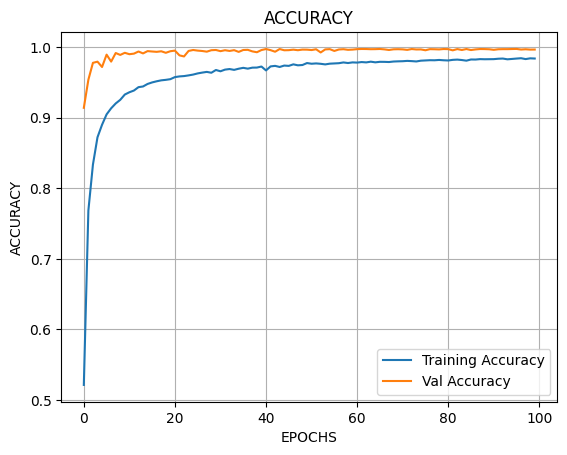

In [18]:
# PLOTTING ACCURACY
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('ACCURACY')
plt.xlabel('EPOCHS')
plt.ylabel('ACCURACY')
plt.legend()
plt.grid(True)
plt.show()


**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**


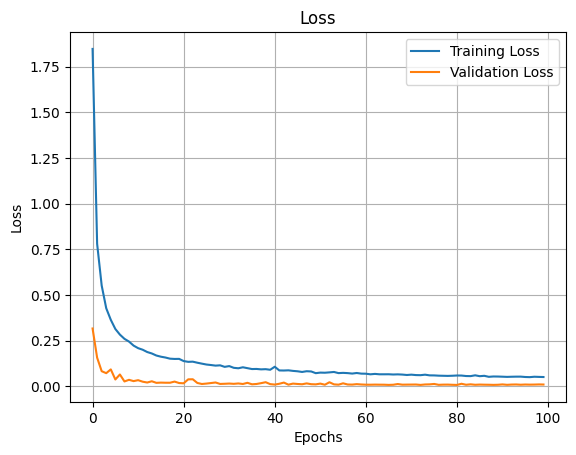

In [19]:
# PLOTTING LOSS
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# SAVING MODEL IN H5 AND PICKLE FORMAT
# model.save("./Trained Models/TSM_CNN_H5_Tensorflow.h5")

pickle_out = open("./Trained Models/TSM_CNN_PICKLE64x64.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [16]:
# LOADING MODEL (LOAD ANY 1)

# H5 FORMAT MODEL
model_h5 = load_model("./Trained Models/TSM_CNN_H5.h5")



# pickle_in = open("Trained Models\TSM_CNN_PICKLE64x64.pkl", "rb")
# loaded_model = pickle.load(pickle_in)
# pickle_in.close()




**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 60)        1560      
                                                                 
 batch_normalization (Batch  (None, 60, 60, 60)        240       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 60)        90060     
                                                                 
 batch_normalization_1 (Bat  (None, 56, 56, 60)        240       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 60)        0         
 D)                                                              
                                                     

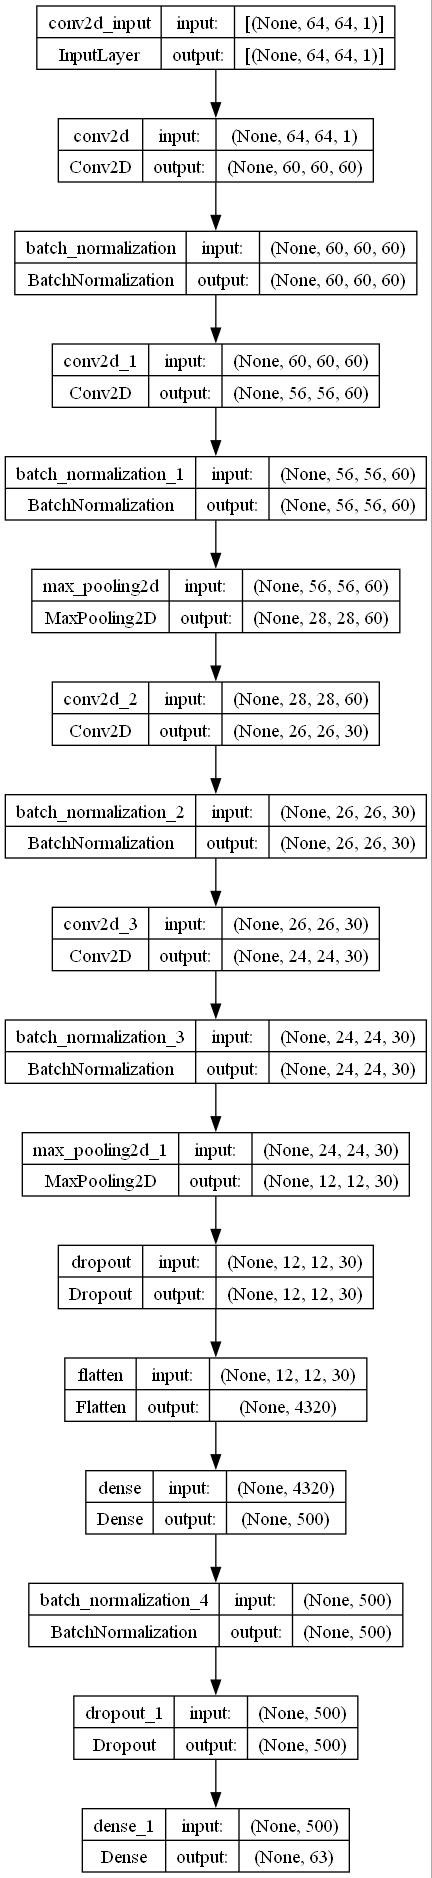

In [1]:
# DIAGRAM OF THE MODEL

from keras.utils import model_to_dot, plot_model
from keras.models import load_model
import os
import pydotplus 

model_path = './Trained Models/TSM_CNN_H5.h5'
loaded_model = load_model(model_path)
loaded_model.summary()

model_image_path = 'model_image.jpg'
plot_model(loaded_model, to_file=model_image_path, show_shapes=True, show_layer_names=True)


In [17]:
# LOAD AND PREPROCESS IMAGES
image_path = "./Dataset/Testing/13.png"
img = cv2.imread(image_path)
img = cv2.resize(img,(64,64))
img = grayScale(img)
img = equalize(img)
img = img / 255.0
img = np.expand_dims(img, axis=0)

1/1 [==============================] - 0s 163ms/step
Predicted Class: 9


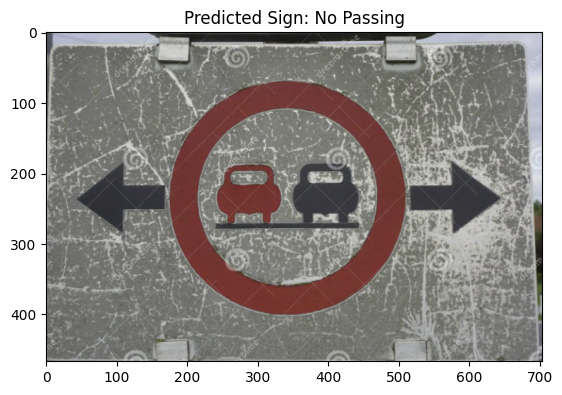

In [19]:
# MAKE PREDICTIONS
predictions = model_h5.predict(img)
predicted_class = np.argmax(predictions)

print(f"Predicted Class: {predicted_class}")

plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Sign: {classes[predicted_class]}")
plt.show()

VISUALISING BATCH NORMALIZATION AND DENSE LAYER


**===============> code by: ✪ 𝕊𝔸𝕃𝕄𝔸ℕ ✪ <===============**


In [ ]:
# Access:http://localhost:6006/

#logs are important for visualising CNN layers during training

# open terminal type:
# 1. tensorboard --logdir=./logs/fit
# 2. Copy the localhost URL and open in browser